# Homework 5 (100 Points)

The focus of this homework will be Network and Graphs as well as Neural Networks.

### Collaborators: Sarah Bonna, Shivangi


## Exercise 1 [30pts]

This exercise will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. [5pts]

You can assume the model is sequential and only uses dense layers. The output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look something like this

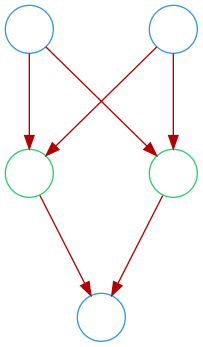

In [ ]:
from IPython.display import Image
Image(filename="example.png")

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

In [5]:
!apt-get install graphviz -y
!pip install pydot
!pip install pydotplus
!apt-get install -y graphviz libgraphviz-dev pkg-config
!pip install pygraphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu4).
graphviz is already the newest version (2.42.2-3build2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installe

In [6]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from networkx import DiGraph, set_node_attributes
from tensorflow.keras.layers import Dense
import keras

def unique_index(layer, node):
    return str(layer) + "_" + str(node)

def plot_keras_network(model, filename):
    graph = DiGraph(nodesep='1', ranksep='1')
    for l in range(len(model.layers)):
            layer = model.layers[l]
            for n in range(0, layer.input_shape[1]):
                if l == 0:
                    graph.add_node(
                        unique_index(l, n),
                        shape="circle",
                        color="#3498db",
                        label=''
                    )
                else:
                    graph.add_node(
                        unique_index(l, n),
                        shape="circle",
                        color="#2ecc71",
                        label=''
                    )

                for h in range(0, layer.output_shape[1]):
                    if l == len(model.layers) - 1:
                        graph.add_node(
                            unique_index(l + 1, h),
                            shape="circle",
                            color="#3498db",
                            label=''
                        )
                    graph.add_edge(
                        unique_index(l, n),
                        unique_index(l + 1, h),
                        color="#B20000"
                    )
    agraph = to_agraph(graph)
    agraph.draw(filename, prog='dot')


In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_dim=2))
model.add(keras.layers.Dense(1))
model.compile(loss="binary_crossentropy")
plot_keras_network(model, "1_a_model.png")


b) Generate 100 datapoints of the form y = 3x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [2.5pts]

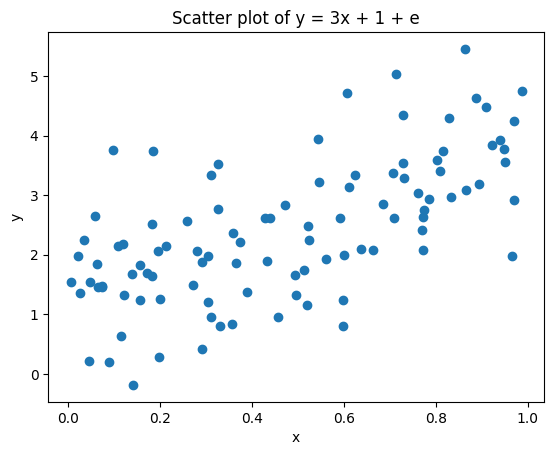

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(size=100)
e = np.random.normal(loc=0, scale=1, size=100)
y = 3 * x + 1 + e

plt.scatter(x, y)
plt.title('Scatter plot of y = 3x + 1 + e')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


c) Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset from b). In a 3D plot, plot the weight, the bias, and the loss value. [5pts]

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.8568


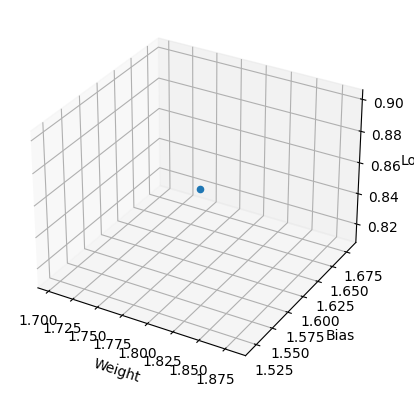

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

input_shape = (1,)

model = Sequential([
    Input(shape=input_shape),
    Dense(1, activation=None)
])

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=0.01))

plot_keras_network(model, "1_c_model.png")

model.fit(x, y, epochs=100, batch_size=30, verbose=0)

weight, bias = model.layers[0].get_weights()
loss = model.evaluate(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weight, bias, loss)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
plt.show()

d) Re-train the model from c) and create an animation of the weight, bias, and loss at each training epoch. [5pts]

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.8609


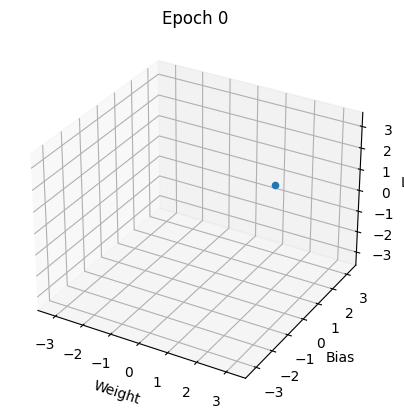

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

input_shape = (1,)

model = Sequential([
    Input(shape=input_shape),
    Dense(1, activation=None)
])

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=0.01))

def update(i):
  model.fit(x, y, epochs=1, batch_size=32)
  weight, bias = model.layers[0].get_weights()
  loss = model.evaluate(x, y)

  ax.clear()
  ax.scatter(weight, bias, loss)
  ax.set_xlabel('Weight')
  ax.set_ylabel('Bias')
  ax.set_zlabel('Loss')
  ax.set_title('Epoch {}'.format(i))

  ax.set_xlim([-3.5, 3.5])
  ax.set_ylim([-3.5, 3.5])
  ax.set_zlim([-3.5, 3.5])

fig = plt.figure()
ax = plt.axes(projection='3d')
ani = FuncAnimation(fig, update, frames=100, interval=200, repeat=True)

ani.save('1_d_animation.gif', writer="pillow", fps=10)

e) Generate data of the form y = 3x^3 + 2x^2 + x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [2.5pts]

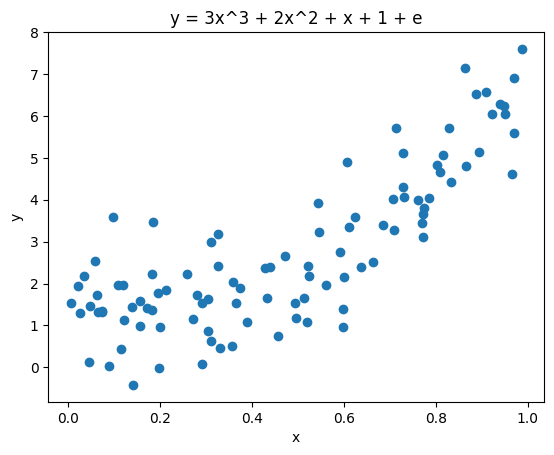

In [26]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(size=100)
e = np.random.normal(loc=0, scale=1, size=100)
y = 3 * x ** 3 + 2 * x ** 2 + x + 1 + e

plt.scatter(x, y)
plt.title('y = 3x^3 + 2x^2 + x + 1 + e')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


f) Create and train a neural network on the dataset from b) and plot the resulting curve through the scatter plot. (you can use any number of epochs, hidden layers etc.) Also create an image of the network using the function from a) [5pts]

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(Dense(100, input_shape=(1,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

plot_keras_network(model, '1_f_model.png')

4/4 [==============================] - 0s 3ms/step
Normalized MSE: 0.016199355399493468


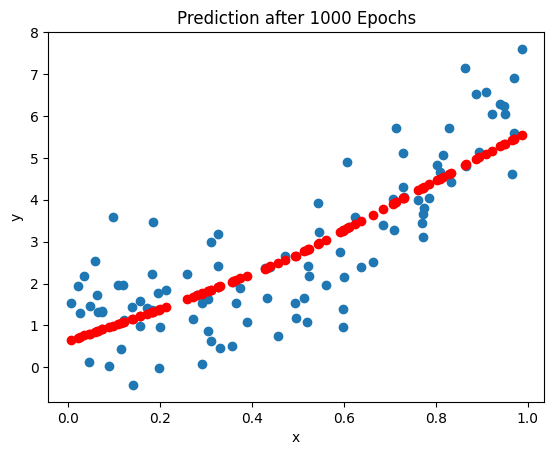

In [20]:
model.fit(x, y, epochs=100, verbose=0)
y_pred = model.predict(x)

mse = mean_squared_error(y, y_pred)
y_range = np.max(y) - np.min(y)
mse_norm = mse / y_range ** 2
print("Normalized MSE:", mse_norm)

plt.scatter(x, y)
plt.scatter(x, y_pred, color='red')
plt.title('Prediction after 1000 Epochs')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

g) Using matplotlib animation, create an animation of the resulting curve from your model at each training epoch (up to 100 epochs). [5pts]

4/4 [==============================] - 0s 4ms/step


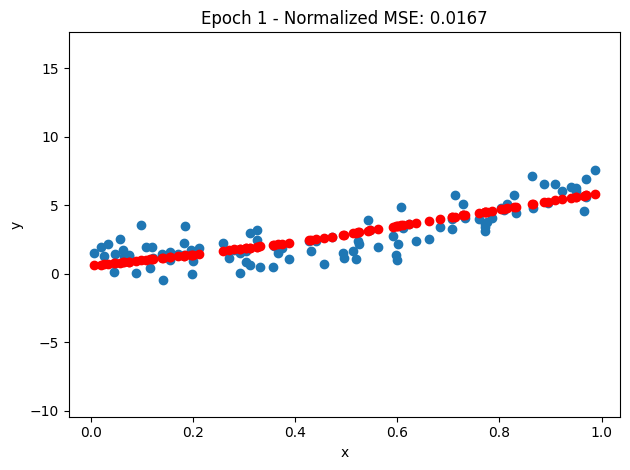

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(Dense(100, input_shape=(1,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(-110, 110)

def update(i):
    model.fit(x, y, epochs=1, verbose=0)
    y_pred = model.predict(x)
    mse = mean_squared_error(y, y_pred)
    y_range = np.max(y) - np.min(y)
    mse_norm = mse / y_range ** 2
    ax.clear()
    ax.scatter(x, y)
    ax.scatter(x, y_pred, color='red')
    ax.set_title(f'Epoch {i+1} - Normalized MSE: {mse_norm:.4f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(np.min(y) - 10, np.max(y) + 10)
    fig.tight_layout()

ani = FuncAnimation(fig, update, frames=100, interval=200)
ani.save('1_g_animation.gif', writer='pillow', fps=5)


## Exercise 2 [50pts]

In this excerise we will be implementing logic gates in various forms.

### Part A: <b> [25pts] </b>

Recall in a logistic regression model we would find the weights and bias such that 
$$P(y=1)=\sigma(w_1 x_1 + w_2 x_2 + b)$$

This means that when $w_1 x_1 + w_2 x_2 + b >0 $ we would predict y = 1. Moving b to the other side, we notice that only when $w_1 x_1 + w_2 x_2 < b $ do we predict y = 1. So the term b acts as a threshold past which the weighted sum of x's would cause the model to predict one class over the other.

In this part you are asked to find (not through gradient descent but through your own understanding of the functions below) the weights and threshold that appropriately describe the function being modeled.

Additional Resource/Hint: [Realization of Logic Gates Using MccullochPitts Neuron Model](https://ijettjournal.org/assets/year/2017/volume-45/number-2/IJETT-V45P212.pdf)

a) Implement the following logic gates <b> - [20pts] </b> <br> 
<ul>
    <li>2 input AND gate</li>
    <li>2 input OR gate</li>
    <li>2 input NOR gate</li>
    <li>1 input NOT gate</li>
    <li>2 input NAND gate</li>
</ul>

by finding the correct weights and threshold.

Additional Resource:[Boolean Algebra Truth Tables for Logic Gate Functions](https://www.electronics-tutorials.ws/boolean/bool_7.html#:~:text=The%20table%20used%20to%20represent,of%20these%20input(s).)

In [ ]:
"""
params
--------------
a = input 1
b = input 2

other definations
--------------
w1 = weight associated with input 1
w2 = weight associated with input 2

returns
--------------
Y = output of the gate
"""
def and_gate(a,b):
    w1 = 1  #TODO set weight w1
    w2 = 1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = 1 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0

def or_gate(a,b):
    w1 = 1  #TODO set weight w1
    w2 = 1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = 0.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0
        
def not_gate(a):
    w1 = -1  #TODO set weight w1
    g = w1*a
    threshold = -0.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0

def nor_gate(a,b):
    w1 = -1  #TODO set weight w1
    w2 = -1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = -1 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0
        
def nand_gate(a,b):
    w1 = -1  #TODO set weight w1
    w2 = -1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = -2 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0 

In [ ]:
# run this cell to check your fucntions
# the output provided it just a sample output. you can check for any values of a and b

def gates(c, a, b=None):
    if c == 1:
        return and_gate(a, b)
    elif c == 2:
        return or_gate(a, b)    
    elif c == 3:
        return not_gate(a)    
    elif c == 4:
        return nor_gate(a, b)  
    elif c == 5:
        return nand_gate(a, b)
    else:
        return "Please check your choice"
        
def inputv(c):
    a = int(input(("Enter 1st value: ")))
    if (a>1 or a<0):
        print("Please check input")
    else:    
        if c!=3:
            b = int(input(("Enter 2st value: ")))
            if (b>1 or b<0):
                print("Please check input") 
            return(a,b)    
    return(a)


while True:
    c = int(input("\n\nEnter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit\n"))
    if c == 6:
        break
    elif c not in range(1, 7):
        print("Please enter a valid choice")
        continue
    else:
        if c != 3:
            a = int(input("Enter 1st value: "))
            b = int(input("Enter 2nd value: "))
            if a not in [0, 1] or b not in [0, 1]:
                print("Please check input")
                continue
        else:
            a = int(input("Enter value: "))
            if a not in [0, 1]:
                print("Please check input")
                continue
        y = gates(c, a, b)
        print("Y =", y)



Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
5
Enter 1st value: 0
Enter 2nd value: 1
Y = 1


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
5
Enter 1st value: 1
Enter 2nd value: 1
Y = 0


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
6


b) implement a XOR gate <b> - [5pts] </b>

Hint: XOR can be implemented as a combination of OR, NAND and AND gates. You can reuse your functions from above

In [ ]:
def xor_gate(a,b):
    nand = nand_gate(a,b)
    org = or_gate(a,b)
    andg = and_gate(nand,org)
    return andg

### Part B: Perceptron Learning Rule [25pts]

a) Inspired by the previous homework's implementation of logistic regression, implement a 2 input OR gate using perceptron learning rule <b>- [20pts] </b>

Recall: A perceptron is a no-hidden-layer neural network (like logistic regression) with a single output that is the activation of a weighted sum (plus a bias) of the inputs.

Your implementation should:
- use a bias
- have a configurable input size (the output size will always be 1)
- have a configurable learning rate
- have a configurable number of epochs
- have a configurable batch size
- support at least two types of activation functions
- support at least two types of losses / cost functions

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """
    Implement a perceptron network
    """
    def __init__(self, input_size, learning_rate=0.1, epochs=100, batch_size=1, activation='step', loss='mse'):
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.activation = activation
        self.loss = loss
        self.weights = np.random.rand(self.input_size+1)

    def get_activation(self):
        activation_func=""
        if self.activation == 'step':
            activation_func = lambda x: np.where(x > 0, 1, 0) 
        elif self.activation == 'sigmoid':
            activation_func = lambda x: 1 / (1 + np.exp(-x))
        else:
            raise ValueError("Invalid activation function")
        return activation_func
    
    def get_loss(self):
        loss_func=""
        if self.loss == 'mse':
            loss_func = lambda y_true, y_pred: np.mean((y_true - y_pred)**2)
        elif self.loss == 'mae':
            loss_func = lambda y_true, y_pred: np.mean(np.abs(y_true - y_pred))
        else:
            raise ValueError("Invalid loss function")
        return loss_func

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0],1)), X])
        activation_func = self.get_activation()
        loss_func = self.get_loss()

        loss_values = []
        for epoch in range(self.epochs):
            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                y_pred = activation_func(np.dot(X_batch, self.weights))
                loss = loss_func(y_batch, y_pred)
                loss_values.append(loss)
                grad = np.dot(X_batch.T, (y_pred - y_batch) * y_pred * (1 - y_pred))
                self.weights -= self.learning_rate * grad

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0],1)), X])
        activation_func = self.get_activation()
        return np.round(activation_func(np.dot(X, self.weights)))

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([0,1,1,1])

perceptron_or = Perceptron(input_size=2, learning_rate=0.1, epochs=100, batch_size=1, activation='sigmoid', loss='mse')
perceptron_or.fit(X, y)

print(perceptron_or.predict(X))


[0. 1. 1. 1.]


b) How were the weights and biases you discovered in part B different from the ones you defined in part A for the OR gate? [5pts]

## Exercise 3 [20pts]

This exercise will focus on Neural Networks.



In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms 
from torch.optim import SGD, Adam
from tqdm import tqdm 

a) Modify the number of layers to include atleast 2 hidden layers with appropriate number of neurons that use the sigmoid function in the forward pass. Also change the epochs, criterion, batch_size. [5pts]

Model which gave close to 77% testing accuracy

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 784)
        self.layer2 = nn.Linear(784, 400)
        self.layer3 = nn.Linear(400, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, input):
        x = F.relu(self.layer1(input.view(-1, 28*28)))
        x = F.sigmoid(self.layer2(x))
        x = self.dropout(x)
        outputs = self.layer3(x)
        return F.softmax(outputs)

epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
batch_size = 128


Model which improved testing performance on testing to ~89%

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size):
    super(NeuralNetwork, self).__init__()

    self.layer1 = nn.Linear(input_size, 800)
    self.layer2 = nn.Linear(800, 400)
    self.layer3 = nn.Linear(400, 10)
    self.dropout = nn.Dropout(0.2)

  def forward(self, input):
    x = F.relu(self.layer1(input))
    x = F.sigmoid(self.layer2(x))
    x = self.dropout(x)
    outputs = self.layer3(x)
    return F.softmax(outputs)

epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.MSELoss()
batch_size = 500


Run the following cell everytime you update the above code

In [ ]:
net = NeuralNetwork(784).to(device)
optimizer = Adam(net.parameters(), lr = 1e-2)

total_loss = 0


#######################################
### Downloading the data


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2)
train_dataloader2 = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2)

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2)
test_dataloader2 = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2)

b) You may change the architecture to increase the accuracy of this model. The goal is to attain the highest possible accuracy. You do not get marks for accuracies less than 83%. You may modify the values in part a [10pts]

In [ ]:
for epoch in tqdm(range(epochs)): 
  epoch_loss = 0
  for i, data in enumerate(train_dataloader): 
    inputs, labels = data 

    optimizer.zero_grad() 
    outputs = net(inputs.view(batch_size,-1).to(device))

    labels_ = F.one_hot(labels, num_classes= 10)

    loss = criterion(outputs,labels_.to(device).float())
    loss.backward()  # update network parameters

    optimizer.step() # update the optimizer parameters 

    total_loss += loss.item() 
    epoch_loss += loss.item()
  
  with torch.no_grad():
    net.eval()
    correct = 0
    total = 0
    for i, data in enumerate(train_dataloader2):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy() 
      correct += sum(1*(labels.numpy()==predictions))
  
  with torch.no_grad():
    net.eval()
    correct_test = 0
    total_test = 0
    for i, data in enumerate(test_dataloader):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total_test+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy() 
      correct_test += sum(1*(labels.numpy()==predictions))

  print("epoch = ", epoch, " loss = ", epoch_loss, "  training accuracy = ", correct/total, "test accuracy = ", correct_test/total_test)

  0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-88-01cab3ebd345>:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(outputs)
  5%|▌         | 1/20 [00:34<10:50, 34.24s/it]

epoch =  0  loss =  8.6854855902493   training accuracy =  0.5314833333333333 test accuracy =  0.5242


 10%|█         | 2/20 [01:01<09:03, 30.17s/it]

epoch =  1  loss =  7.1971323899924755   training accuracy =  0.54005 test accuracy =  0.5311


 15%|█▌        | 3/20 [01:29<08:13, 29.05s/it]

epoch =  2  loss =  7.045324757695198   training accuracy =  0.5349666666666667 test accuracy =  0.5261


 20%|██        | 4/20 [01:56<07:33, 28.33s/it]

epoch =  3  loss =  6.417871594429016   training accuracy =  0.6677 test accuracy =  0.6547


 25%|██▌       | 5/20 [02:24<07:03, 28.23s/it]

epoch =  4  loss =  3.7952955327928066   training accuracy =  0.7844 test accuracy =  0.7648


 30%|███       | 6/20 [02:54<06:42, 28.77s/it]

epoch =  5  loss =  3.3493464402854443   training accuracy =  0.7909 test accuracy =  0.7713


 35%|███▌      | 7/20 [03:23<06:16, 28.98s/it]

epoch =  6  loss =  3.257948087528348   training accuracy =  0.7970666666666667 test accuracy =  0.7766


 40%|████      | 8/20 [03:53<05:50, 29.18s/it]

epoch =  7  loss =  3.0635340977460146   training accuracy =  0.89645 test accuracy =  0.8718


 45%|████▌     | 9/20 [04:25<05:29, 29.96s/it]

epoch =  8  loss =  1.9454934252426028   training accuracy =  0.8980666666666667 test accuracy =  0.8729


 50%|█████     | 10/20 [04:57<05:06, 30.61s/it]

epoch =  9  loss =  1.834816343151033   training accuracy =  0.8958166666666667 test accuracy =  0.8723


 55%|█████▌    | 11/20 [05:28<04:38, 30.89s/it]

epoch =  10  loss =  1.7833055071532726   training accuracy =  0.9088333333333334 test accuracy =  0.8802


 60%|██████    | 12/20 [06:02<04:14, 31.87s/it]

epoch =  11  loss =  1.7597284438088536   training accuracy =  0.8935166666666666 test accuracy =  0.8662


 65%|██████▌   | 13/20 [06:36<03:46, 32.29s/it]

epoch =  12  loss =  1.7457022368907928   training accuracy =  0.9004666666666666 test accuracy =  0.8736


 70%|███████   | 14/20 [07:09<03:16, 32.74s/it]

epoch =  13  loss =  1.6854582568630576   training accuracy =  0.8963333333333333 test accuracy =  0.8645


 75%|███████▌  | 15/20 [07:45<02:48, 33.66s/it]

epoch =  14  loss =  1.626717634499073   training accuracy =  0.8998166666666667 test accuracy =  0.8682


 80%|████████  | 16/20 [08:20<02:15, 33.96s/it]

epoch =  15  loss =  1.6478663124144077   training accuracy =  0.9106333333333333 test accuracy =  0.8811


 85%|████████▌ | 17/20 [08:56<01:44, 34.73s/it]

epoch =  16  loss =  1.6200494412332773   training accuracy =  0.9149 test accuracy =  0.8841


 90%|█████████ | 18/20 [09:34<01:11, 35.57s/it]

epoch =  17  loss =  1.570212583988905   training accuracy =  0.9166666666666666 test accuracy =  0.8813


 95%|█████████▌| 19/20 [10:12<00:36, 36.39s/it]

epoch =  18  loss =  1.576647930778563   training accuracy =  0.9165666666666666 test accuracy =  0.8822


100%|██████████| 20/20 [10:50<00:00, 32.53s/it]

epoch =  19  loss =  1.5130695784464478   training accuracy =  0.9212333333333333 test accuracy =  0.8872


d) Explain in ~150 words your choice of architecture and parameters, and your general process. [5pts]

Firstly, I tried a neural network with 10 epochs, CrossEntropy Loss and 128 (default given) batch size which gave me close to 77% testing accuracy. I changed the parameters for the model with 20 epochs, MSE loss and 500 batch size, which improved the testing accuracy to ~89%.